In [27]:
import numpy as nmp
from scipy.stats import expon, chi2
import matplotlib.pyplot as plt

plt.style.use('dark_background')

$ f(x,y) = e^{-x-y} $

$ f(x) =  \int_0^{+\infty} e^{-x-y} \delta y = e^{-x} $

$ E(x) = \int_0^{+\infty} x f(x) \delta x = 1 $

$ D(x) = \int_0^{+\infty} (x-1)^2 f(x) \delta x = 1 $

$ f(y) =  \int_0^{+\infty} e^{-x-y} \delta x = e^{-y} $

$ E(y) = \int_0^{+\infty} y f(y) \delta y = 1 $

$ D(y) = \int_0^{+\infty} (y-1)^2 f(y) \delta y = 1 $

$ E(xy) = \int_0^{+\infty}\int_0^{+\infty} xye^{-x-y} dxdy  = 1$

$ Cov(x,y) = E(xy) - E(x)E(y) = 1 - 1 = 0 $

$ r(x,y) = \dfrac{Cov(x,y)}{\sigma (x) \sigma (y)} = 0 $

$ f(y|x=x_1) = \dfrac{f(x_1 , y)}{f(x_1)} = e^{-y} $

$ f(x|y=y_1) = \dfrac{f(x , y_1)}{f(y_1)} = e^{-x} $


In [28]:
n = 1000

In [29]:
n = int(input('Enter n: '))

In [30]:
def analyze(x, y, pdf):
    xy = x * y
    bins = nmp.linspace(0, max(x.max(), y.max()), 50)
    e_bins = (bins[:-1] + bins[1:]) / 2
    x_space = nmp.linspace(0, x.max(), 100)
    y_space = nmp.linspace(0, y.max(), 100)

    x_bins, *_ = plt.hist(x, bins=bins, density=True)
    if pdf is not None:
        plt.plot(x_space, pdf(x_space), label='f(x)')
        plt.legend()
    plt.show()

    y_bins, *_ = plt.hist(y, bins=bins, density=True)
    if pdf is not None:
        plt.plot(y_space, pdf(y_space), label='f(y)')
        plt.legend()
    plt.show()

    # Plot 3D xy

    xy_bins, *_ = nmp.histogram2d(x, y, bins=bins, density=True)

    _xx, _yy = nmp.meshgrid(bins[:-1], bins[:-1])
    _x, _y = _xx.ravel(), _yy.ravel()

    top = xy_bins.ravel()
    bottom = 0
    width = depth = bins[1] - bins[0]

    ax = plt.axes(projection='3d')
    ax.bar3d(_x, _y, bottom, width, depth, top, shade=True)
    if pdf is not None:
        ax.plot_surface(
            _xx,
            _yy,
            nmp.exp(-_xx - _yy),
            rstride=1,
            cstride=1,
            cmap='viridis',
            edgecolor='none'
        )
    ax.view_init(30, 60)
    plt.show()
    if pdf is not None:
        ax = plt.axes(projection='3d')
        ax.plot_surface(
            _xx,
            _yy,
            nmp.exp(-_xx - _yy),
            rstride=1,
            cstride=1,
            cmap='viridis',
            edgecolor='none'
        )
        ax.view_init(30, 60)
        plt.show()

    # E(x)

    e_x = nmp.mean(x)
    print(f'E(x):{e_x}')

    # E(y)

    e_y = nmp.mean(y)
    print(f'E(y):{e_y}')

    #Cov(x,y)
    cov_xy = ((x - e_x) * (y - e_y)).sum() / (n - 1)
    print(f'Cov(x,y):{cov_xy}')

    # D(x)

    d_x = nmp.mean(x * x) - e_x ** 2
    print(f'D(x): {d_x}')

    # D(y)

    d_y = nmp.mean(y * y) - e_y ** 2
    print(f'D(y): {d_y}')

    # r(x,y)
    cor_xy = cov_xy / nmp.sqrt(d_x * d_y)
    print(f'r(x,y)={cor_xy}')

    gamma = 0.95
    tau = 1.96

    delta_x = tau * nmp.sqrt(d_x) / nmp.sqrt(n)
    delta_y = tau * nmp.sqrt(d_y) / nmp.sqrt(n)

    print(f'E_int(x): {e_x - delta_x, e_x + delta_x}')
    print(f'E_int(y): {e_y - delta_y, e_y + delta_y}')

    alpha_1 = (1 - gamma) / 2
    alpha_2 = (1 + gamma) / 2

    xi_1 = chi2.ppf(alpha_1, df=n - 1)
    xi_2 = chi2.ppf(alpha_2, df=n - 1)
    s2_x = n / (n - 1) * d_x
    s2_y = n / (n - 1) * d_y

    print(f'D_int_x: {(n - 1) * s2_x / xi_2, (n - 1) * s2_x / xi_1}')
    print(f'D_int_y: {(n - 1) * s2_y / xi_2, (n - 1) * s2_y / xi_1}')

    z = 0.5 * nmp.log((1 + cor_xy) / (1 - cor_xy))
    print(f'r_int(x,y): {nmp.tanh(z - tau / nmp.sqrt(n - 3)), nmp.tanh(z + tau / nmp.sqrt(n - 3))}')


In [31]:
def rev_random(rev: callable) -> float:
    r = nmp.random.random()
    return rev(r)


def exp_rev(x_i) -> float:
    return - nmp.log(x_i)

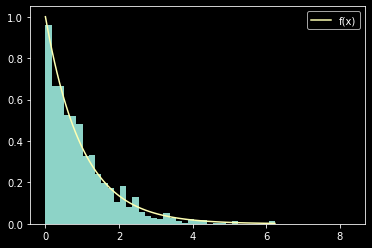

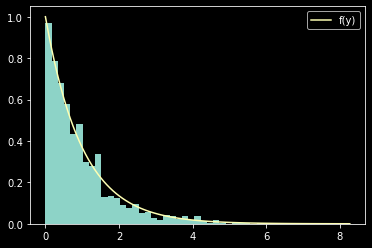

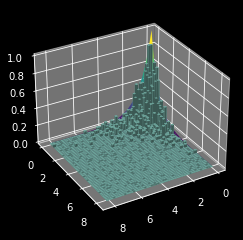

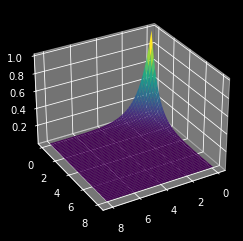

E(x):0.9615098083629048
E(y):0.960922422833604
Cov(x,y):-0.040254817013653355
D(x): 0.8115555948491555
D(y): 0.9743821168197535
r(x,y)=-0.04526828760558951
E_int(x): (0.905673691259613, 1.0173459254661965)
E_int(y): (0.8997408378592445, 1.0221040078079635)
D_int_x: (0.7455812925225246, 0.888595979154617)
D_int_y: (0.8951710550456337, 1.0668795048195436)
r_int(x,y): (-0.10696233022443474, 0.016773002401357925)


In [32]:
x = nmp.array([rev_random(exp_rev) for i in range(n)])
y = nmp.array([rev_random(exp_rev) for i in range(n)])
analyze(x, y, lambda x: nmp.exp(-x))

In [33]:
p_matrix = nmp.array(
    [
        [2, 2, 3, 4, 5],
        [2, 3, 4, 5, 6],
        [3, 4, 5, 4, 7],
        [4, 5, 6, 1, 8],
        [3, 2, 3, 4, 5],
    ]
)
sigma_x = nmp.sqrt(1.7564)
sigma_y = nmp.sqrt(2.0104)

In [40]:
import pandas

p_matrix = nmp.array(pandas.read_csv(input('Enter p matrix path:') , header=None))
# x_len = int(input('Enter number of x values:'))
# y_len = int(input('Enter number of y values:'))

In [41]:
p_matrix = p_matrix / p_matrix.sum()
x_origins = nmp.arange(p_matrix.shape[0])
y_origins = nmp.arange(p_matrix.shape[1])
print(x_origins)
print(y_origins)
print(p_matrix)

[0 1 2 3 4]
[0 1 2 3 4]
[[0.01587302 0.03174603 0.04761905 0.06349206 0.07936508]
 [0.03174603 0.01587302 0.03174603 0.04761905 0.06349206]
 [0.04761905 0.03174603 0.01587302 0.03174603 0.04761905]
 [0.06349206 0.04761905 0.03174603 0.01587302 0.03174603]
 [0.04761905 0.06349206 0.04761905 0.03174603 0.01587302]]


In [42]:
p_x = p_matrix.sum(axis=1)
p_y = p_matrix.sum(axis=0)
print(f'p_x: {p_x}')
print(f'p_y: {p_y}')

p_x: [0.23809524 0.19047619 0.17460317 0.19047619 0.20634921]
p_y: [0.20634921 0.19047619 0.17460317 0.19047619 0.23809524]


$ E(x) = \sum x_i p_{xi} = 2.06 $

$ E(y) = \sum y_i p_{yi} = 2.36 $

$ E(xy) = \sum_i \sum_j x_i y_j p_{ij} = 4.74 $

$ Cov(x,y) = E(xy) - E(x)E(y) = -0.1216 $

$ D(x) = \sum p_{xi} * \cdot ( x_i - E(x)) ^ 2 = 1.7564 $

$ D(y) = \sum p_{yi} * \cdot ( y_i - E(y)) ^ 2 = 2.0104 $

$ r(x,y) = \dfrac{Cov(x,y)}{\sigma (x) \sigma (y)} = -0.2285 $

In [43]:
p_matrix_normalized = p_matrix.copy()
for i in range(len(p_y)):
    p_matrix_normalized[:, i] /= p_matrix_normalized[:, i].sum()

for y_i in y_origins:
    print(f'p(x|y={y_i}): {p_matrix_normalized[:, y_i]}')

p(x|y=0): [0.07692308 0.15384615 0.23076923 0.30769231 0.23076923]
p(x|y=1): [0.16666667 0.08333333 0.16666667 0.25       0.33333333]
p(x|y=2): [0.27272727 0.18181818 0.09090909 0.18181818 0.27272727]
p(x|y=3): [0.33333333 0.25       0.16666667 0.08333333 0.16666667]
p(x|y=4): [0.33333333 0.26666667 0.2        0.13333333 0.06666667]


In [44]:
def choice(probs: list[float]):
    r = nmp.random.random()
    i = 0
    p_sum = 0
    while p_sum <= r and i < len(probs):
        p_sum += probs[i]
        i += 1
    i -= 1
    return i


x = nmp.array([choice(p_x) for _ in range(n)])

p_matrix_normalized = p_matrix.copy()
for i in range(len(p_x)):
    p_matrix_normalized[i] /= p_matrix_normalized[i].sum()

y = nmp.array([choice(p_matrix_normalized[x_i]) for x_i in x])

for x_i in x_origins:
    print(f'p(y|x={x_i}): {p_matrix_normalized[x_i]}')

p(y|x=0): [0.06666667 0.13333333 0.2        0.26666667 0.33333333]
p(y|x=1): [0.16666667 0.08333333 0.16666667 0.25       0.33333333]
p(y|x=2): [0.27272727 0.18181818 0.09090909 0.18181818 0.27272727]
p(y|x=3): [0.33333333 0.25       0.16666667 0.08333333 0.16666667]
p(y|x=4): [0.23076923 0.30769231 0.23076923 0.15384615 0.07692308]


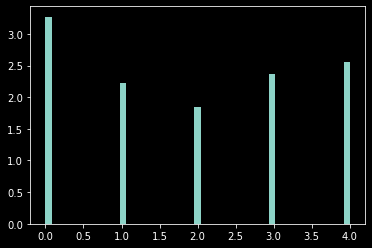

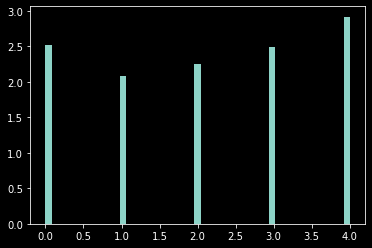

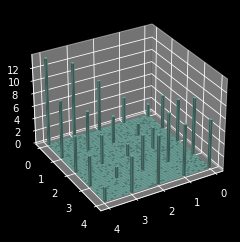

E(x):1.896
E(y):2.099
Cov(x,y):-0.7614654654654655
D(x): 2.2671840000000003
D(y): 2.135198999999999
r(x,y)=-0.34608888283371836
E_int(x): (1.8026746869579318, 1.989325313042068)
E_int(y): (2.008431901431023, 2.1895680985689774)
D_int_x: (2.0828763769666057, 2.482406133591055)
D_int_y: (1.9616209170595404, 2.337891893219732)
r_int(x,y): (-0.39951138116098295, -0.2903237072888235)


In [45]:
analyze(x, y, None)